In [1]:
# Importing all the required Libraries

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.layers import Dense,Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.utils import np_utils, print_summary
from tensorflow.keras import layers
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import keras as k
import pickle
import os
import glob
from keras.callbacks import TensorBoard
import warnings
warnings.filterwarnings("ignore") # ignore warnings
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  

In [4]:
root='C:\\Users\\jimev\\Desktop\\Project\\Data\\Data\\'

In [6]:
# Function for Loading Data
def load_data(root, vfold_ratio=0.2, max_items_per_class= 10000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        
        temp=[]
        temp=class_name.split('_')
        class_name=temp[-1]
        
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [7]:
x_train, y_train, x_test, y_test, class_names = load_data('C:\\Users\\jimev\\Desktop\\Project\\Data\\Data\\')
num_classes = len(class_names)
image_size = 28

In [8]:
class_names

['airplane', 'alarm clock', 'ambulance', 'angel']

In [9]:
len(x_train)

32000

In [10]:
len(x_test)

8000

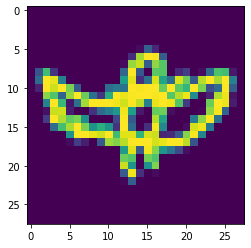

In [32]:
plt.imshow(x_train[idx].reshape(28,28))

ambulance


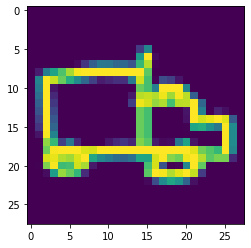

In [11]:
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [12]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = k.utils.to_categorical(y_train, num_classes)
y_test = k.utils.to_categorical(y_test, num_classes)

In [13]:
y_test

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [14]:
def keras_model(image_x, image_y):
    global class_names
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(image_x,image_y, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(len(class_names), activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "QuickDraw.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list

In [15]:
model, callbacks_list = keras_model(28,28)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [16]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 28800 samples, validate on 3200 samples
Epoch 1/5





 - 21s - loss: 0.5432 - acc: 0.7995 - val_loss: 0.2525 - val_acc: 0.9169
Epoch 2/5
 - 19s - loss: 0.2493 - acc: 0.9212 - val_loss: 0.1984 - val_acc: 0.9313
Epoch 3/5
 - 17s - loss: 0.1867 - acc: 0.9409 - val_loss: 0.1643 - val_acc: 0.9428
Epoch 4/5
 - 16s - loss: 0.1558 - acc: 0.9506 - val_loss: 0.1558 - val_acc: 0.9444
Epoch 5/5
 - 16s - loss: 0.1367 - acc: 0.9553 - val_loss: 0.1369 - val_acc: 0.9547


In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 95.55%


['ambulance', 'alarm clock', 'angel', 'airplane']


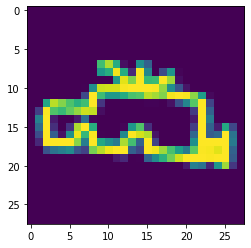

In [18]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

In [19]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [20]:
model.save('myModel.h5')

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
__________

In [7]:
# !pip install tensorflowjs 

In [8]:
# !mkdir model
# !tensorflowjs_converter --input_format keras keras.h5 model/

In [9]:
#!pip install Pillow

In [23]:
from PIL import Image

In [24]:
image = Image.open('test.png')

In [25]:
print(image.palette)

None


In [26]:
new_image = image.resize((28, 28))

In [27]:
from IPython.display import Image as i
from PIL import Image
from keras.preprocessing import image


In [28]:
#i('test.png')

In [29]:
#test = image.img_to_array('test.png')

In [30]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [31]:
from PIL import Image
print(Image.__file__)

C:\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py


In [32]:
import Image
print(Image.__file__)

C:\Anaconda3\envs\deeplearning\lib\site-packages\PIL\Image.py


In [34]:
test_image = image.load_img('test.png', target_size=(28,28))

In [35]:
from matplotlib.image import imread

In [36]:
img = imread('test.png')

In [38]:
import cv2
image_x=28
image_y=28
#img_re=cv2.reshape(img, image_x, image_y, 1).astype('float32')

In [40]:
img_re=cv2.reshape(img, )
img_re.shape
plt.imshow(img_re)

In [41]:
model.predict_classes(img_re)